In [8]:
import numpy as np
import pandas as pd

In [1]:
pwd()

'/Users/brucepei/Data_Science_Projects/data_wrangling_pandas'

In [67]:
df=pd.read_csv("sample-data-l3.csv")

In [32]:
df.head(3)

,Unnamed: 0,department,age,height,food,color,sport
0,Jane,biology,32,160.0,steak,blue,NaN
1,Sara,chemistry,40,158.0,lamb,red,NaN
2,Nicole,NaN,35,170.0,apple,orange,NaN


In [33]:
df.tail(3)

,Unnamed: 0,department,age,height,food,color,sport
6,John,statistics,45,NaN,NaN,orange,NaN
7,Ramon,computer,40,175.0,cheese,yellow,NaN
8,Bryce,engineering,28,180.0,steak,blue,NaN


### explore data information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
Unnamed: 0    9 non-null object
department    7 non-null object
age           9 non-null int64
height        7 non-null float64
food          7 non-null object
color         9 non-null object
sport         0 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 584.0+ bytes


In [10]:
df.department.size

9

In [11]:
df.size

63

In [18]:
import numpy as np
a = pd.DataFrame([1, 1, 1, np.nan], index=['a', 'b', 'c', 'd'],columns=['one'])
b = pd.DataFrame(dict(one=[1, np.nan, 1, np.nan],two=[np.nan, 2, np.nan, 2]),index=['a', 'b', 'd', 'e'])
#Mismatched indices will be unioned together
a.add(b, fill_value=0)

,one,two
a,2.0,NaN
b,1.0,2.0
c,1.0,NaN
d,1.0,NaN
e,NaN,2.0


### df.age.sum() #count(), add(), agg 
### df.department.size

In [11]:
print("sum:",df.age.sum(),"\n")
print("count:",df.age.count(),"\n")
print("df.count:",df.count(),"\n")
print("agg:",df.age.agg(["mean","sum","count"]))

sum: 350 

count: 9 

df.count: Unnamed: 0    9
department    7
age           9
height        7
food          7
color         9
sport         0
dtype: int64 

agg: mean      38.888889
sum      350.000000
count      9.000000
Name: age, dtype: float64


In [74]:
print("df.age.size:", df.age.size)
print("df.size:",df.size)

df.age.size: 9
df.size: 63


In [34]:
print("df.sport.size:",df.sport.size)
print("df.sport.count:",df.sport.count)

# count is how many available values in that column
# size is the number of cells in that column

df.sport.size: 9
df.sport.count: <bound method Series.count of 0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
Name: sport, dtype: float64>


In [22]:
df.sample()

,Unnamed: 0,department,age,height,food,color,sport
1,Sara,chemistry,40,158.0,lamb,red,NaN


In [12]:
# 5 Examine statistics of your data
df.department.describe()

count              7
unique             5
top       statistics
freq               2
Name: department, dtype: object

In [35]:
df.describe()

,age,height,sport
count,9.000000,7.000000,0.0
mean,38.888889,169.000000,NaN
std,7.043516,8.286535,NaN
min,28.000000,158.000000,NaN
25%,35.000000,162.500000,NaN
50%,40.000000,170.000000,NaN
75%,45.000000,175.000000,NaN
max,50.000000,180.000000,NaN


In [36]:
# 6 like SQL query
df.query("age>20 and height <160")
# like a SQL

,Unnamed: 0,department,age,height,food,color,sport
1,Sara,chemistry,40,158.0,lamb,red,NaN


In [37]:
df[(df.age > 35) & (df.height <160)]

,Unnamed: 0,department,age,height,food,color,sport
1,Sara,chemistry,40,158.0,lamb,red,NaN


In [14]:
# 7 # Examine null values
df.isnull().head(2)

,Unnamed: 0,department,age,height,food,color,sport
0,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True


In [79]:
df.notnull().head(2)

,Unnamed: 0,department,age,height,food,color,sport
0,True,True,True,True,True,True,False
1,True,True,True,True,True,True,False


In [80]:
df.age.isnull().head(2)

0    False
1    False
Name: age, dtype: bool

In [27]:
import missingno as msno

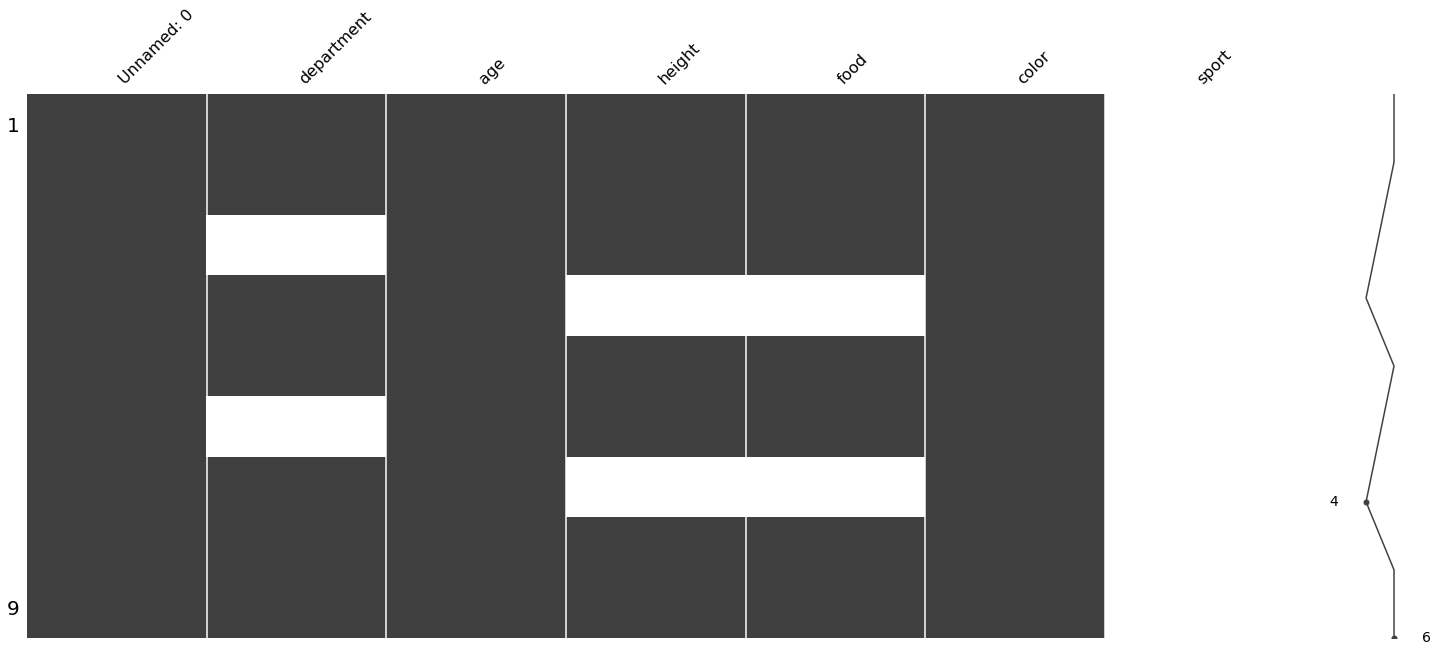

In [28]:
# show missing values
msno.matrix(df)

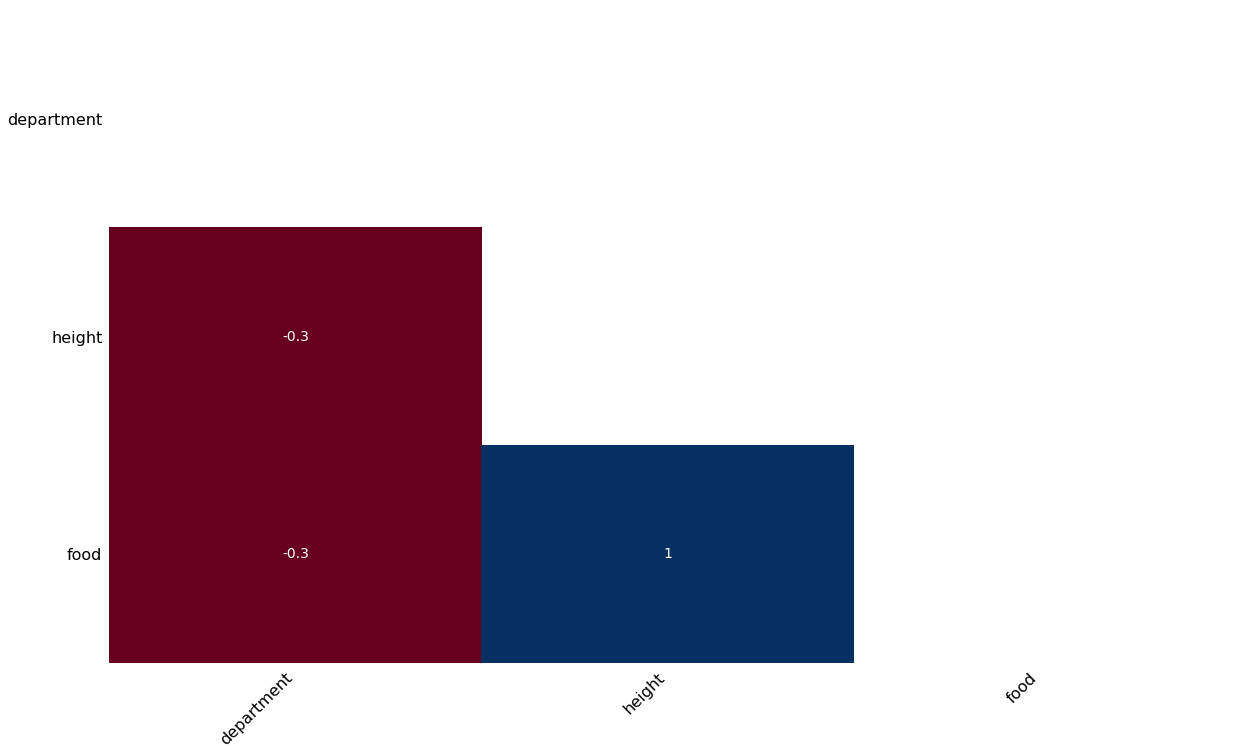

In [29]:
msno.heatmap(df)

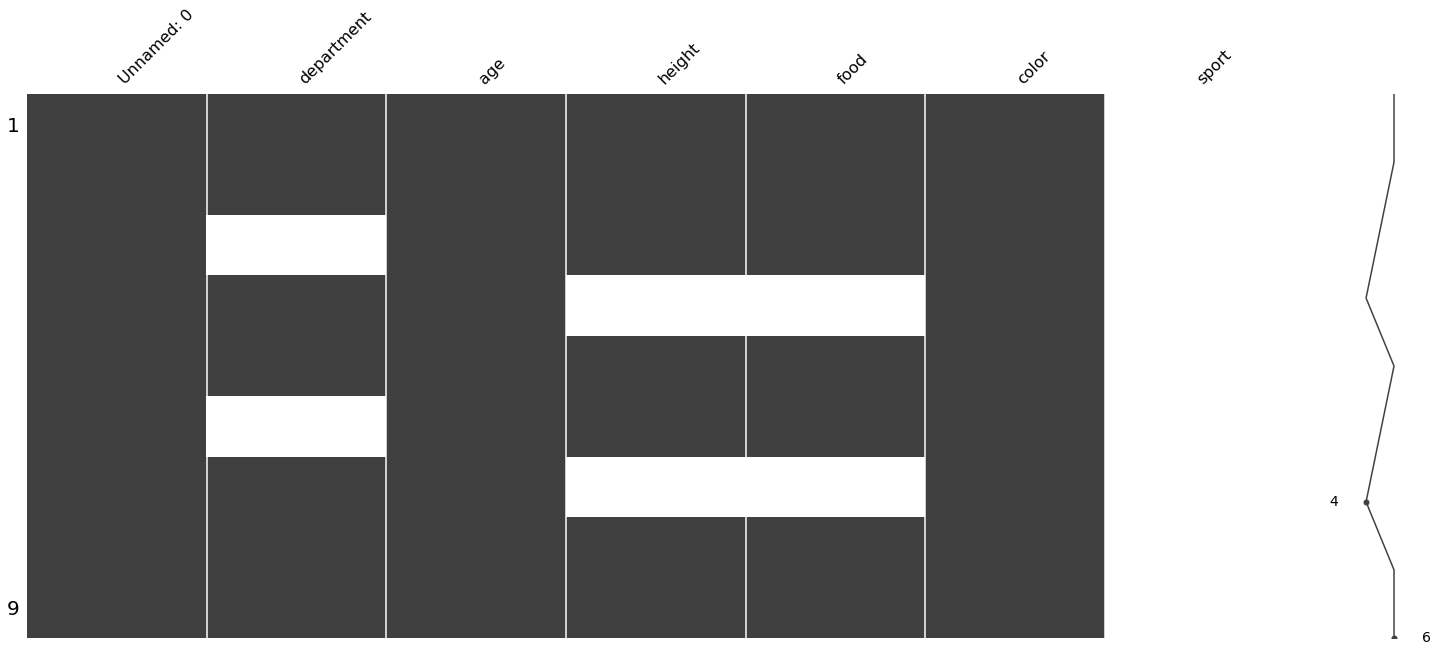

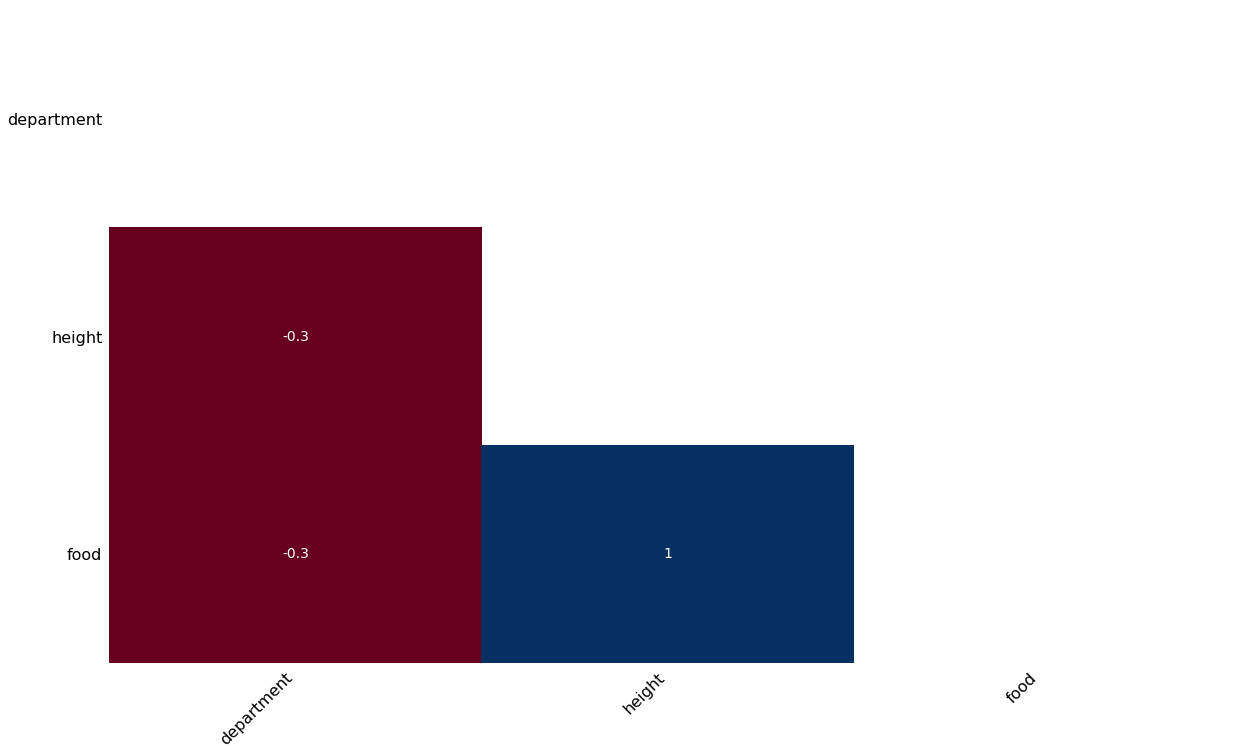

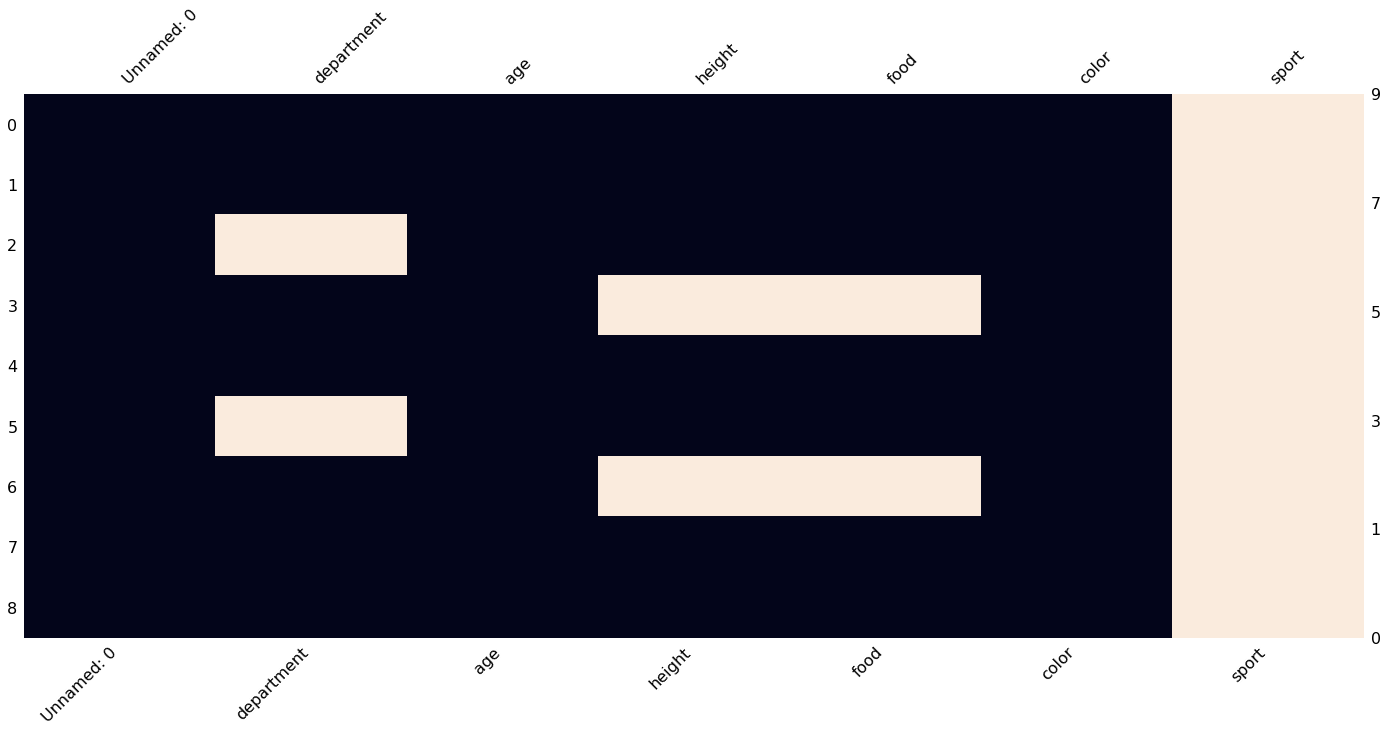

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
msno.matrix(df)
msno.heatmap(df)
msno.bar(df)
sns.heatmap(df.isnull(), cbar=False)

## Drop the missing values

In [38]:
df.dropna(axis = 0)
# drop the whole column if there is a null in the table

,Unnamed: 0,department,age,height,food,color,sport


In [39]:
df.dropna(subset=['height'],axis = 0)
# only drop the row if height is null
# axis = 1 column, axis = 0 is row

,Unnamed: 0,department,age,height,food,color,sport
0,Jane,biology,32,160.0,steak,blue,NaN
1,Sara,chemistry,40,158.0,lamb,red,NaN
2,Nicole,NaN,35,170.0,apple,orange,NaN
4,Jeff,statistics,35,175.0,steak,blue,NaN
5,Reza,NaN,45,165.0,lamb,red,NaN
7,Ramon,computer,40,175.0,cheese,yellow,NaN
8,Bryce,engineering,28,180.0,steak,blue,NaN


In [40]:
df.dropna(axis='columns')

,Unnamed: 0,age,color
0,Jane,32,blue
1,Sara,40,red
2,Nicole,35,orange
3,Kaden,50,yellow
4,Jeff,35,blue
5,Reza,45,red
6,John,45,orange
7,Ramon,40,yellow
8,Bryce,28,blue


In [41]:
df.dropna(axis = 1)
# this is the same as (axis = 'columns')

,Unnamed: 0,age,color
0,Jane,32,blue
1,Sara,40,red
2,Nicole,35,orange
3,Kaden,50,yellow
4,Jeff,35,blue
5,Reza,45,red
6,John,45,orange
7,Ramon,40,yellow
8,Bryce,28,blue


In [42]:
df.dropna(axis=1,how='any')
# drop columns if there is a "any" missing value
# default is "any"
# drop columns if there are all "all" missing value

,Unnamed: 0,age,color
0,Jane,32,blue
1,Sara,40,red
2,Nicole,35,orange
3,Kaden,50,yellow
4,Jeff,35,blue
5,Reza,45,red
6,John,45,orange
7,Ramon,40,yellow
8,Bryce,28,blue


In [43]:
df.dropna(axis=1,how='all')

,Unnamed: 0,department,age,height,food,color
0,Jane,biology,32,160.0,steak,blue
1,Sara,chemistry,40,158.0,lamb,red
2,Nicole,NaN,35,170.0,apple,orange
3,Kaden,computer,50,NaN,NaN,yellow
4,Jeff,statistics,35,175.0,steak,blue
5,Reza,NaN,45,165.0,lamb,red
6,John,statistics,45,NaN,NaN,orange
7,Ramon,computer,40,175.0,cheese,yellow
8,Bryce,engineering,28,180.0,steak,blue


In [53]:
df.dropna(axis=1,thresh=7)
#threash : column has to have at least threash # of items (not null)

,Unnamed: 0,department,age,height,food,color
0,Jane,biology,32,160.0,steak,blue
1,Sara,chemistry,40,158.0,lamb,red
2,Nicole,NaN,35,170.0,apple,orange
3,Kaden,computer,50,NaN,NaN,yellow
4,Jeff,statistics,35,175.0,steak,blue
5,Reza,NaN,45,165.0,lamb,red
6,John,statistics,45,NaN,NaN,orange
7,Ramon,computer,40,175.0,cheese,yellow
8,Bryce,engineering,28,180.0,steak,blue


In [45]:
df[2:4].age

2    35
3    50
Name: age, dtype: int64

## 1. replace with ffillna()

In [68]:
df.fillna(method='ffill',axis=0)
# replace the missing data with ...
# 1 - replace with row, 0 with column #

,Unnamed: 0,department,age,height,food,color,sport
0,Jane,biology,32,160.0,steak,blue,NaN
1,Sara,chemistry,40,158.0,lamb,red,NaN
2,Nicole,chemistry,35,170.0,apple,orange,NaN
3,Kaden,computer,50,170.0,apple,yellow,NaN
4,Jeff,statistics,35,175.0,steak,blue,NaN
5,Reza,statistics,45,165.0,lamb,red,NaN
6,John,statistics,45,165.0,lamb,orange,NaN
7,Ramon,computer,40,175.0,cheese,yellow,NaN
8,Bryce,engineering,28,180.0,steak,blue,NaN


## 2. replace missing data with replace()

In [69]:
mean=df.height.mean()
print(mean)
df['height'].replace(np.nan,mean)
# data wont change if you assign the value to the column

169.0


0    160.0
1    158.0
2    170.0
3    169.0
4    175.0
5    165.0
6    169.0
7    175.0
8    180.0
Name: height, dtype: float64

In [55]:
# data wont change if you assign the value to the column
df_n=df
df_n['height'] =df_n['height'].replace(np.nan, mean)
df_n

,Unnamed: 0,department,age,height,food,color,sport
0,Jane,biology,32,160.0,steak,blue,NaN
1,Sara,chemistry,40,158.0,lamb,red,NaN
2,Nicole,NaN,35,170.0,apple,orange,NaN
3,Kaden,computer,50,169.0,NaN,yellow,NaN
4,Jeff,statistics,35,175.0,steak,blue,NaN
5,Reza,NaN,45,165.0,lamb,red,NaN
6,John,statistics,45,169.0,NaN,orange,NaN
7,Ramon,computer,40,175.0,cheese,yellow,NaN
8,Bryce,engineering,28,180.0,steak,blue,NaN


## replace missing values by Scikit Learn package

In [71]:
X=df
X

,Unnamed: 0,department,age,height,food,color,sport
0,Jane,biology,32,160.0,steak,blue,NaN
1,Sara,chemistry,40,158.0,lamb,red,NaN
2,Nicole,NaN,35,170.0,apple,orange,NaN
3,Kaden,computer,50,NaN,NaN,yellow,NaN
4,Jeff,statistics,35,175.0,steak,blue,NaN
5,Reza,NaN,45,165.0,lamb,red,NaN
6,John,statistics,45,NaN,NaN,orange,NaN
7,Ramon,computer,40,175.0,cheese,yellow,NaN
8,Bryce,engineering,28,180.0,steak,blue,NaN


## replace categorical data to numerical data

In [74]:
for col_name in X.columns:
    if(X[col_name].dtype == 'object'):
        X[col_name]= X[col_name].astype('category')
        X[col_name] = X[col_name].cat.codes

In [78]:
X=X.drop(["sport"],axis=1)

In [79]:
X.loc[:, X.columns[X.isnull().any()].tolist()]

,height
0,160.0
1,158.0
2,170.0
3,NaN
4,175.0
5,165.0
6,NaN
7,175.0
8,180.0


In [80]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
#imputer = imputer.fit(X.loc[:, X.columns[X.isnull().any()].tolist()])
X.loc[:, X.columns[X.isnull().any()].tolist()] = imputer.fit_transform(X.loc[:, X.columns[X.isnull().any()].tolist()])

In [81]:
X.head()

,Unnamed: 0,department,age,height,food,color
0,1,0,32,160.0,3,0
1,8,1,40,158.0,2,2
2,5,-1,35,170.0,0,1
3,4,2,50,170.0,-1,3
4,2,4,35,175.0,3,0
